In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rc('legend',fontsize=15)

plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 12

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
plt.style.use('../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches

In [4]:
lgMhalo = np.linspace(6, 16, 100)
lgMhalo_short = np.linspace(7, 12, 100)

In [5]:
lgMs_B19 = gh.lgMs_B18(lgMhalo)
lgMs_RP17 = gh.lgMs_RP17(lgMhalo)

jsm_3 = jsm_SHMR.general_new([10.5, 3.0, 0, 0, 0, 0], lgMhalo_short, 0, 1)

jsm_1 = jsm_SHMR.general_new([10.5, 1.0, 0, 0, 0, 0], lgMhalo_short, 0, 1)

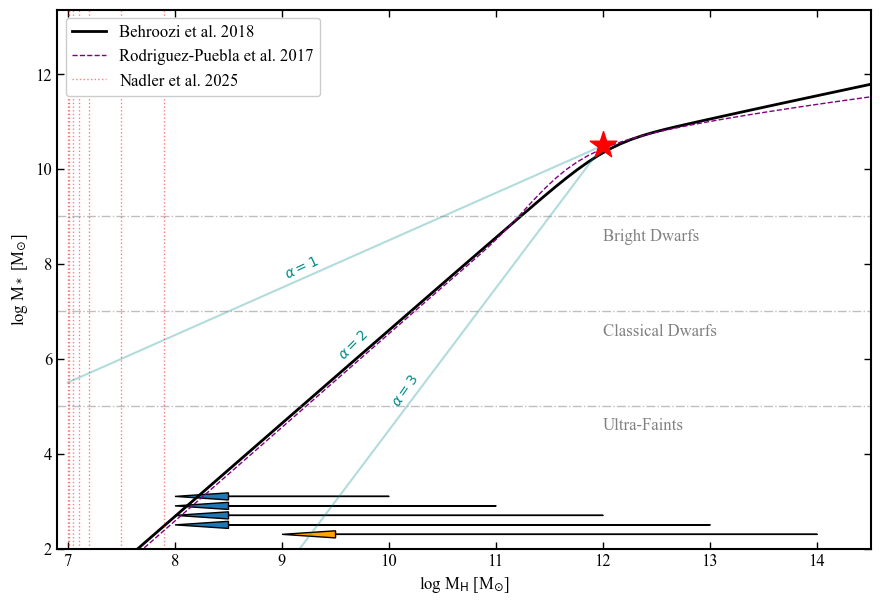

In [6]:
plt.figure(figsize=(double_textwidth*1.5, double_textwidth))

plt.plot(lgMhalo, lgMs_B19, label="Behroozi et al. 2018", lw=2, color="k")
plt.plot(lgMhalo, lgMs_RP17, label="Rodriguez-Puebla et al. 2017", lw=1, color="purple", ls="--")

plt.plot(lgMhalo_short, jsm_3, color="darkcyan", alpha=0.3)
plt.plot(lgMhalo_short, jsm_1, color="darkcyan", alpha=0.3)

plt.axhline(9, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 8.5, "Bright Dwarfs", color="grey", fontsize=12)

plt.axhline(7, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 6.5, "Classical Dwarfs", color="grey", fontsize=12)

plt.axhline(5, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 4.5, "Ultra-Faints", color="grey", fontsize=12)

plt.axvline(7, ls=":", color="red", alpha=0.5, lw=1, label="Nadler et al. 2025")
plt.axvline(7.01, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.05, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.1, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.2, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.5, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.9, ls=":", color="red", alpha=0.5, lw=1)

plt.scatter(12, 10.5, marker="*", s=400, zorder=10, color="red")
plt.text(10, 5, s="$\\alpha = 3$", rotation=55, color="darkcyan")
plt.text(9.5, 6, s="$\\alpha = 2$", rotation=45, color="darkcyan")
plt.text(9, 7.7, s="$\\alpha = 1$", rotation=25, color="darkcyan")

plt.arrow(14, 2.3, dx=-5,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True, facecolor="orange")
plt.arrow(13, 2.5, dx=-5,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
plt.arrow(12, 2.7, dx=-4,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
plt.arrow(11, 2.9, dx=-3,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
plt.arrow(10, 3.1, dx=-2,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)

plt.xlim(6.9, 14.5)
plt.ylim(2)

plt.legend(loc=2, framealpha=1)

plt.ylabel("log M$_{\\rm *}$ [M$_{\\odot}$]")
plt.xlabel("log M$_{\\rm H}$ [M$_{\\odot}$]")
plt.show()

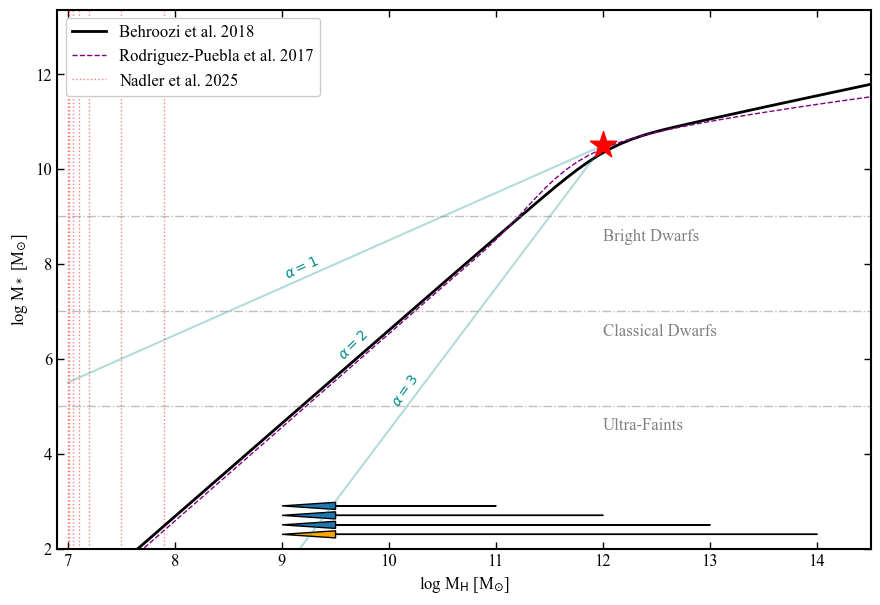

In [7]:
plt.figure(figsize=(double_textwidth*1.5, double_textwidth))

plt.plot(lgMhalo, lgMs_B19, label="Behroozi et al. 2018", lw=2, color="k")
plt.plot(lgMhalo, lgMs_RP17, label="Rodriguez-Puebla et al. 2017", lw=1, color="purple", ls="--")

plt.plot(lgMhalo_short, jsm_3, color="darkcyan", alpha=0.3)
plt.plot(lgMhalo_short, jsm_1, color="darkcyan", alpha=0.3)

plt.axhline(9, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 8.5, "Bright Dwarfs", color="grey", fontsize=12)

plt.axhline(7, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 6.5, "Classical Dwarfs", color="grey", fontsize=12)

plt.axhline(5, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 4.5, "Ultra-Faints", color="grey", fontsize=12)

plt.axvline(7, ls=":", color="red", alpha=0.5, lw=1, label="Nadler et al. 2025")
plt.axvline(7.01, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.05, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.1, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.2, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.5, ls=":", color="red", alpha=0.5, lw=1)
plt.axvline(7.9, ls=":", color="red", alpha=0.5, lw=1)

plt.scatter(12, 10.5, marker="*", s=400, zorder=10, color="red")
plt.text(10, 5, s="$\\alpha = 3$", rotation=55, color="darkcyan")
plt.text(9.5, 6, s="$\\alpha = 2$", rotation=45, color="darkcyan")
plt.text(9, 7.7, s="$\\alpha = 1$", rotation=25, color="darkcyan")

plt.arrow(14, 2.3, dx=-5,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True, facecolor="orange")
plt.arrow(13, 2.5, dx=-4,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
plt.arrow(12, 2.7, dx=-3,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
plt.arrow(11, 2.9, dx=-2,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
# plt.arrow(10, 3.1, dx=-1,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)

plt.xlim(6.9, 14.5)
plt.ylim(2)

plt.legend(loc=2, framealpha=1)

plt.ylabel("log M$_{\\rm *}$ [M$_{\\odot}$]")
plt.xlabel("log M$_{\\rm H}$ [M$_{\\odot}$]")
plt.show()

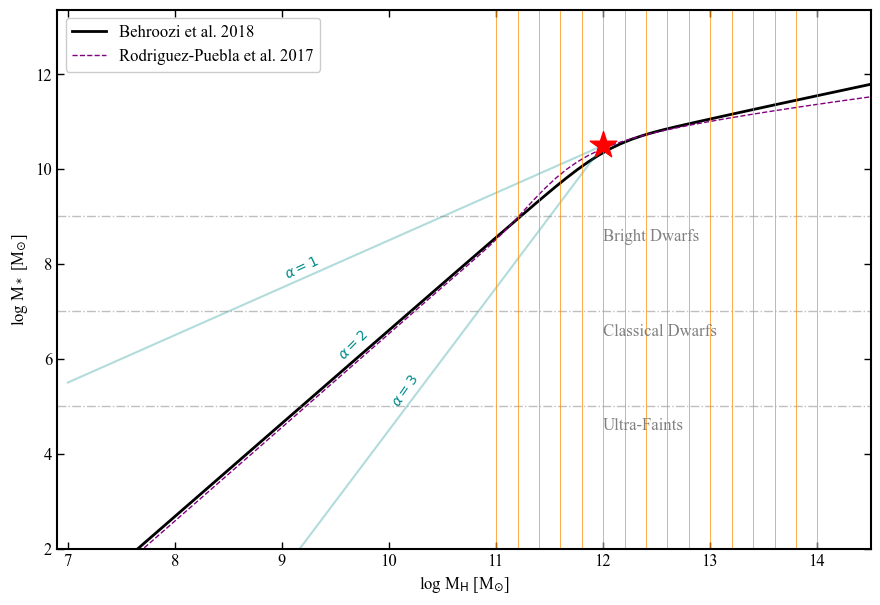

In [9]:
plt.figure(figsize=(double_textwidth*1.5, double_textwidth))

plt.plot(lgMhalo, lgMs_B19, label="Behroozi et al. 2018", lw=2, color="k")
plt.plot(lgMhalo, lgMs_RP17, label="Rodriguez-Puebla et al. 2017", lw=1, color="purple", ls="--")

plt.plot(lgMhalo_short, jsm_3, color="darkcyan", alpha=0.3)
plt.plot(lgMhalo_short, jsm_1, color="darkcyan", alpha=0.3)

plt.axhline(9, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 8.5, "Bright Dwarfs", color="grey", fontsize=12)

plt.axhline(7, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 6.5, "Classical Dwarfs", color="grey", fontsize=12)

plt.axhline(5, ls="-.", color="grey", alpha=0.5, lw=1)
plt.text(12, 4.5, "Ultra-Faints", color="grey", fontsize=12)

# plt.axvline(7, ls=":", color="red", alpha=0.5, lw=1, label="Nadler et al. 2025")
# plt.axvline(7.01, ls=":", color="red", alpha=0.5, lw=1)
# plt.axvline(7.05, ls=":", color="red", alpha=0.5, lw=1)
# plt.axvline(7.1, ls=":", color="red", alpha=0.5, lw=1)
# plt.axvline(7.2, ls=":", color="red", alpha=0.5, lw=1)
# plt.axvline(7.5, ls=":", color="red", alpha=0.5, lw=1)
# plt.axvline(7.9, ls=":", color="red", alpha=0.5, lw=1)

plt.scatter(12, 10.5, marker="*", s=400, zorder=10, color="red")
plt.text(10, 5, s="$\\alpha = 3$", rotation=55, color="darkcyan")
plt.text(9.5, 6, s="$\\alpha = 2$", rotation=45, color="darkcyan")
plt.text(9, 7.7, s="$\\alpha = 1$", rotation=25, color="darkcyan")

# plt.arrow(14, 2.3, dx=-5,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True, facecolor="orange")
# plt.arrow(13, 2.5, dx=-4,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
# plt.arrow(12, 2.7, dx=-3,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
# plt.arrow(11, 2.9, dx=-2,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)
# plt.arrow(10, 3.1, dx=-1,dy=0, head_width=0.15, head_length=0.5, length_includes_head=True)

for i in np.arange(11, 14.2, 0.2):
    plt.axvline(i, color="darkorange", lw=0.5)

plt.xlim(6.9, 14.5)
plt.ylim(2)

plt.legend(loc=2, framealpha=1)

plt.ylabel("log M$_{\\rm *}$ [M$_{\\odot}$]")
plt.xlabel("log M$_{\\rm H}$ [M$_{\\odot}$]")
plt.show()